<a href="https://colab.research.google.com/github/francianerod/Python-SoulCode/blob/main/Projeto_Pandas_Mongo_13_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Solicitação**

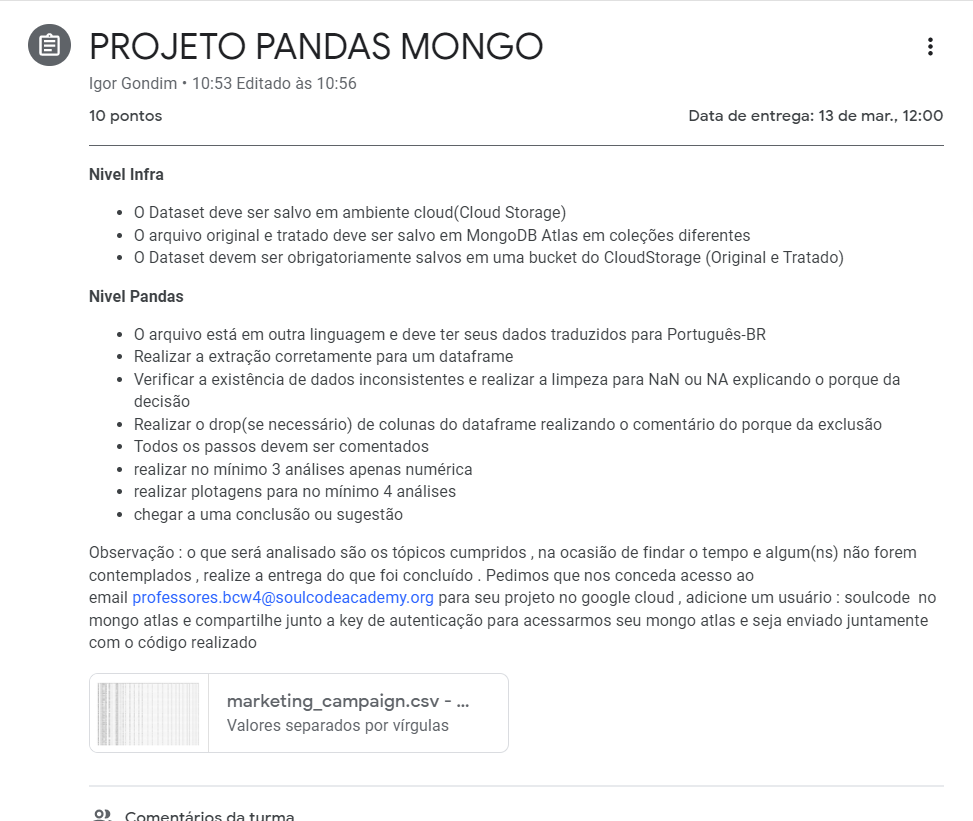

https://colab.research.google.com/drive/1Y6yYTuB3O2vPco_peAAoaaQT3Ph5_PvE?usp=share_link

## **Informações gerais da Base de Dados**

Nesta análise buscaremos responder a algumas perguntas principais:

1. Quem são nossos clientes?
2. O que nossos clientes compram?
3. Como nossos clientes compram?
4. Qual campanha foi a mais adequada?
5. Segmentação do píblico premium


**Sobre este arquivo**

Esses dados foram coletados durante a campanha do ano passado (2020).

Resposta (alvo) - 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário.

*   ID: ID único de cada cliente
*   Year_Birth: ano que o cliente nasceu
*   Education: nível de educação do cliente
*   Marital_status: estado civil do cliente
*   Income: renda familiar anual do cliente
*   Kidhome: número de crianças pequenas na casa do cliente
*   Teenhome: número de adolescentes na casa do cliente
*   Dt_Customer: data de cadastro do cliente na empresa
*   Recency: número de dias desde a última compra
*   MntWines: valor gasto em vinho nos últimos 2 anos
*   MntFruits: valor gasto em frutas nos últimos 2 anos
*   MntMeatProducts: valor gasto em produtos de carne nos últimos 2 anos
*   MntFishProducts: o valor gasto em produtos de peixe nos últimos 2 anos
*   MntSweetProducts: valor gasto em doces nos últimos 2 anos
*   MntGoldProds: o valor gasto em produtos de ouro nos últimos 2 anos
*   NumDealsPurchases: número de compras feitas com desconto
*   NNumWebPurchases: número de compras feitas através do site da empresa
*   NumCatalogPurchases: número de compras feitas usando o catálogo (compra de mercadorias a serem enviadas pelo correio)
*   NumStorePurchases: número de compras feitas diretamente nas lojas
*   NumWebVisitsMonth: número de visitas ao site da empresa no último mês
*   AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
*   AcceptedCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
*   AcceptedCmp5: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
*   AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
*   AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
*   Complain: 1 se o cliente reclamou nos últimos 2 anos (reclamação)
*   Response: (alvo) - 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário
*   Z_CostContact: custo de contato?
*   Z_Revenue: custo de receita?


Fonte: O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.

Acesso: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

## **Instalação de módulos**

In [1]:
#!pip install gcsfs
#!pip install pymongo
#!pip install pandera

## **Importação de módulos**

In [2]:
# Importação de módulos
import os
import pymongo
import numpy as np
import pandas as pd
import pandera as pa
from pymongo import MongoClient
from google.cloud import storage

In [3]:
# Config. do pandas
pd.set_option('display.max_columns', 100)

## **Conexões com GPC - Bucket e MongoDB**

In [4]:
# CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto) - ACESSO O PROJETO
serviceAccount = '/content/drive/MyDrive/S3_Pandas Mongo/Projeto Pandas Mongo/francianegustavo130323-25004ff08ec3.json' 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount  

In [5]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('pandasmongo')
bucket.blob('marketing_campaign.csv - marketing_campaign.csv - marketing_campaign.csv (1).csv')
path = 'gs://pandasmongo/bruto/marketing_campaign.csv - marketing_campaign.csv - marketing_campaign.csv (1).csv'

In [6]:
'''
# Conector MongoDB
import pymongo
from pymongo import MongoClient


uri = "mongodb+srv://cluster0.xfdrk6y.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-5987900765985357042.pem',
                     )

db = client['pandasmongo']
colecao = db['bruto']
doc_count = colecao.count_documents({})
print(doc_count)
'''

'\n# Conector MongoDB\nimport pymongo\nfrom pymongo import MongoClient\n\n\nuri = "mongodb+srv://cluster0.xfdrk6y.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"\nclient = MongoClient(uri,\n                     tls=True,\n                     tlsCertificateKeyFile=\'/content/X509-cert-5987900765985357042.pem\',\n                     )\n\ndb = client[\'pandasmongo\']\ncolecao = db[\'bruto\']\ndoc_count = colecao.count_documents({})\nprint(doc_count)\n'

## **EXTRAÇÃO**

In [7]:
# Abertura da base de dados e cópia de segurança
df = pd.read_csv(path,sep=',',encoding='ISO-8859-1')
dfback = df.copy()

## **Pré-Análise**

In [8]:
# Verificação das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# Observação da base de dados
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## **TRANSFORMAÇÃO**

**Mudanças gerais no dataframe**  

*   Tradução de colunas
*   Tradução de categorias dentro das colunas:
    *   educacao: Tradução de categoria
    *   estado_civil: Tradução de categoria
*   Mudar o número 0 e 1 para as palavras "Não" e "Sim", respectivamente.
*   Data de cadastro: transformação para datetime
*   Renda anual apresentou dados incompletos (averiguação)


In [10]:
# Tradução de colunas 
df.rename(columns={'Year_Birth': 'ano_nasc',
                   'Education': 'educacao',
                   'Marital_Status':'estado_civil',
                   'Income': 'renda_anual',
                   'Kidhome': 'qtd_crianca',
                   'Teenhome': 'qtd_adolescente', 
                   'Dt_Customer': 'data_cadastro',
                   'Recency': 'n_dias_ultima_compra',
                   'MntWines': 'vinho',
                   'MntFruits': 'fruta',
                   'MntMeatProducts': 'carne',
                   'MntFishProducts': 'peixe',
                   'MntSweetProducts': 'doce',
                   'MntGoldProds': 'pdt_ouro',
                   'NumDealsPurchases': 'n_desconto_compras',
                   'NumWebPurchases': 'n_web_compras',
                   'NumCatalogPurchases': 'n_catalog_compras',
                   'NumStorePurchases': 'n_loja_compras',
                   'NumWebVisitsMonth': 'n_visit_web',
                   'AcceptedCmp3': 'aceitoCmp_3',
                   'AcceptedCmp4': 'aceitoCmp_4',
                   'AcceptedCmp5': 'aceitoCmp_5',
                   'AcceptedCmp1': 'aceitoCmp_1',
                   'AcceptedCmp2': 'aceitoCmp_2',
                   'Complain': 'reclamacao',
                   'Z_CostContact': 'custocontato',
                   'Z_Revenue': 'receita',
                   'Response': 'ult_aceitoCmp',
                   },
                   inplace = True)

**Informativo sobre estado civil:**

*   **Absurd:** Não há um status civil conhecido como "Absurd" em português. Pode ser um erro de digitação ou uma referência a um status civil fictício.
*   **YOLO:** "You Only Live Once" é uma expressão em inglês que significa "Você só vive uma vez". Não é um status civil em português, mas pode ser usado como uma referência a um estilo de vida que valoriza a aventura e a experiência acima de tudo.


In [11]:
# Verificação de categorias
print(sorted(pd.unique(df['educacao'])))
print('----------------------------------')
print(sorted(pd.unique(df['estado_civil'])))
print('----------------------------------')

['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
----------------------------------
['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']
----------------------------------


In [12]:
# Tradução das categorias
df.loc[df.educacao == 'Basic',          ['educacao']] = 'BÁSICO'
df.loc[df.educacao == 'Graduation',     ['educacao']] = 'GRADUAÇÃO'
df.loc[df.educacao == '2n Cycle',       ['educacao']] = 'ESPECIALIZAÇÃO'
df.loc[df.educacao == 'Master',         ['educacao']] = 'MESTRADO'
df.loc[df.educacao == 'PhD',            ['educacao']] = 'DOUTORADO'

In [13]:
# Tradução das categorias
df.loc[df.estado_civil == 'Alone',       ['estado_civil']] = 'SOZINHO'
df.loc[df.estado_civil == 'Single',      ['estado_civil']] = 'SOLTEIRO(A)'
df.loc[df.estado_civil == 'Together',    ['estado_civil']] = 'JUNTO(A)'
df.loc[df.estado_civil == 'Married',     ['estado_civil']] = 'CASADO(A)'
df.loc[df.estado_civil == 'Divorced',    ['estado_civil']] = 'DIVORCIADO(A)'
df.loc[df.estado_civil == 'Widow',       ['estado_civil']] = 'VIÚVO(A)'
df.loc[df.estado_civil == 'Absurd',      ['estado_civil']] = 'DESCONHECIDO'

In [14]:
# Transformando os dados 0 e 1 do dataframe
df['aceitoCmp_1'  ] = df['aceitoCmp_1'].replace({0 : "Não", 1: "Sim"})
df['aceitoCmp_2'  ] = df['aceitoCmp_2'].replace({0 : "Não", 1: "Sim"})
df['aceitoCmp_3'  ] = df['aceitoCmp_3'].replace({0 : "Não", 1: "Sim"})
df['aceitoCmp_4'  ] = df['aceitoCmp_4'].replace({0 : "Não", 1: "Sim"})
df['aceitoCmp_5'  ] = df['aceitoCmp_5'].replace({0 : "Não", 1: "Sim"})
df['reclamacao'   ] = df['reclamacao' ].replace({0 : "Não", 1: "Sim"})
df['ult_aceitoCmp'] = df['ult_aceitoCmp'].replace({0 : "Não", 1: "Sim"})

In [15]:
# Tranformando as datas
df['data_cadastro'] = df['data_cadastro'].astype(str)
df['data_cadastro'] = pd.to_datetime(df['data_cadastro'], format='%d-%m-%Y')

In [16]:
# Verificando quantidade e se são valores únicos na coluna de ID
print(len(df.ID.unique()))
print(df.ID.is_unique)

2240
True


In [17]:
# Verificar a quantidade de valores Nulos, ausentes, etc
print(df.isna().sum())

ID                       0
ano_nasc                 0
educacao                 0
estado_civil             0
renda_anual             24
qtd_crianca              0
qtd_adolescente          0
data_cadastro            0
n_dias_ultima_compra     0
vinho                    0
fruta                    0
carne                    0
peixe                    0
doce                     0
pdt_ouro                 0
n_desconto_compras       0
n_web_compras            0
n_catalog_compras        0
n_loja_compras           0
n_visit_web              0
aceitoCmp_3              0
aceitoCmp_4              0
aceitoCmp_5              0
aceitoCmp_1              0
aceitoCmp_2              0
reclamacao               0
custocontato             0
receita                  0
ult_aceitoCmp            0
dtype: int64


In [18]:
# Transformando valores 0.0 para np.NaN
df['renda_anual'].replace(0.0, np.nan, inplace=True)

In [19]:
# Verificação de valores duplicados
df.duplicated().sum()

0

In [20]:
# Cálculo se o cliente tem filho ou não
df['pais'] = (df['qtd_crianca'] + df['qtd_adolescente'] > 0).astype(int)
df['pais'] = df['pais'].replace({0 : "Não", 1: "Sim"})

In [21]:
# Calculo sobre a idade do cliente
df['idade'] = 2020 - df['ano_nasc']

In [22]:
# Retirando a coluna de 'ano_nasc', 'ID','ano_nasc','custocontato','receita'
df.drop(['ID','ano_nasc', 'custocontato','receita'],axis=1,inplace=True)
df.dtypes

educacao                        object
estado_civil                    object
renda_anual                    float64
qtd_crianca                      int64
qtd_adolescente                  int64
data_cadastro           datetime64[ns]
n_dias_ultima_compra             int64
vinho                            int64
fruta                            int64
carne                            int64
peixe                            int64
doce                             int64
pdt_ouro                         int64
n_desconto_compras               int64
n_web_compras                    int64
n_catalog_compras                int64
n_loja_compras                   int64
n_visit_web                      int64
aceitoCmp_3                     object
aceitoCmp_4                     object
aceitoCmp_5                     object
aceitoCmp_1                     object
aceitoCmp_2                     object
reclamacao                      object
ult_aceitoCmp                   object
pais                     

## **Validação SCHEMA**

In [23]:
# Verificar as colunas e os tipos de dados que dataframe possui.
df.dtypes

educacao                        object
estado_civil                    object
renda_anual                    float64
qtd_crianca                      int64
qtd_adolescente                  int64
data_cadastro           datetime64[ns]
n_dias_ultima_compra             int64
vinho                            int64
fruta                            int64
carne                            int64
peixe                            int64
doce                             int64
pdt_ouro                         int64
n_desconto_compras               int64
n_web_compras                    int64
n_catalog_compras                int64
n_loja_compras                   int64
n_visit_web                      int64
aceitoCmp_3                     object
aceitoCmp_4                     object
aceitoCmp_5                     object
aceitoCmp_1                     object
aceitoCmp_2                     object
reclamacao                      object
ult_aceitoCmp                   object
pais                     

In [24]:
# Verificação da qualidade do conjunto de dados
schema = pa.DataFrameSchema(columns = {'educacao':pa.Column(pa.String),
                                       'estado_civil':pa.Column(pa.String),
                                       'renda_anual':pa.Column(pa.Float, nullable=True),
                                       'qtd_crianca':pa.Column(pa.Int),
                                       'qtd_adolescente':pa.Column(pa.Int),
                                       'data_cadastro':pa.Column(pa.DateTime),                        
                                       'n_dias_ultima_compra':pa.Column(pa.Int),
                                       'vinho':pa.Column(pa.Int),
                                       'fruta':pa.Column(pa.Int),
                                       'carne':pa.Column(pa.Int),
                                       'peixe':pa.Column(pa.Int),
                                       'doce':pa.Column(pa.Int),
                                       'pdt_ouro':pa.Column(pa.Int),
                                       'n_desconto_compras':pa.Column(pa.Int),
                                       'n_web_compras':pa.Column(pa.Int),
                                       'n_catalog_compras':pa.Column(pa.Int),
                                       'n_loja_compras':pa.Column(pa.Int),
                                       'n_visit_web':pa.Column(pa.Int),
                                       'aceitoCmp_3':pa.Column(pa.String),
                                       'aceitoCmp_4':pa.Column(pa.String),
                                       'aceitoCmp_5':pa.Column(pa.String),
                                       'aceitoCmp_1':pa.Column(pa.String),
                                       'aceitoCmp_2':pa.Column(pa.String),
                                       'reclamacao':pa.Column(pa.String),
                                       'ult_aceitoCmp':pa.Column(pa.String),
                                       'idade':pa.Column(pa.Int),
                                       'pais':pa.Column(pa.Int)
                                      }
                           )

In [25]:
# Backup do dataframe tratado e validado
dftratado = df.copy()

## **CARREGAMENTO**

In [26]:
df.to_csv('marketing_tratado.csv', index=False) # salva localmente

In [27]:
df.to_csv('gs://pandasmongo/tratado/camp_marketing_tratado.csv', index=False) # salva no bucket

In [28]:
# Carregamento no mongo

## **Análises**

### **1. QUEM SÃO NOSSOS CLIENTES? (GERAL)** ###



*   Idade
*   Educação
*   Estado Civil
*   Tem filhos?
*   Renda




In [29]:
# IDADE
# As 10 Idades mais frequentes
df.groupby(['idade']).size().sort_values(ascending=False).head(10)

idade
44    89
49    87
45    83
48    79
50    77
42    77
55    74
47    74
51    71
46    69
dtype: int64

<AxesSubplot:xlabel='Idade', ylabel='Quantidade de pessoas'>

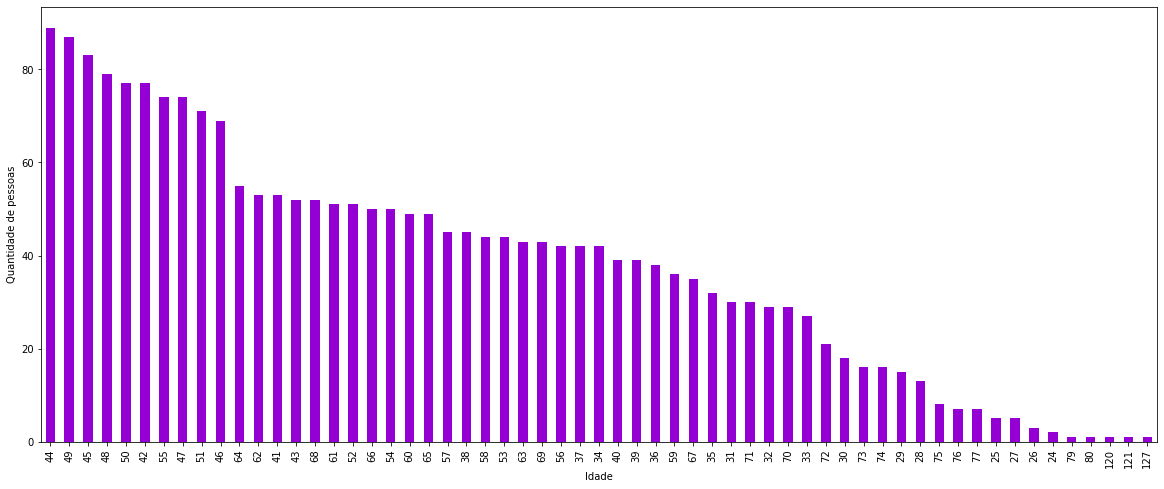

In [30]:
# Visualização da idade dos clientes
df.groupby(['idade'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(20,8),xlabel='Idade',ylabel='Quantidade de pessoas', color=['DarkViolet'])

In [31]:
# EDUCAÇÃO
# Checando o nível de educação dos clientes
df.groupby(['educacao']).size().sort_values(ascending=False)

educacao
GRADUAÇÃO         1127
DOUTORADO          486
MESTRADO           370
ESPECIALIZAÇÃO     203
BÁSICO              54
dtype: int64

In [32]:
# Calculo de porcentagem
grad = (1127/2240)*100
dout = (486/2240)*100
mest = (370/2240)*100
espe = (206/2240)*100
basi = (54/2240)*100

# Mostrando os resultados
print('Os graduados representam ', round(grad,1),'%')
print('Os doutores  representam ', round(dout,1),'%')
print('Os mestres representam ', round(mest,1),'%')
print('Os especialistas representam ', round(espe,1),'%')
print('Aqueles com educação básica representam ', round(basi,1),'%')

Os graduados representam  50.3 %
Os doutores  representam  21.7 %
Os mestres representam  16.5 %
Os especialistas representam  9.2 %
Aqueles com educação básica representam  2.4 %


<AxesSubplot:ylabel='educacao'>

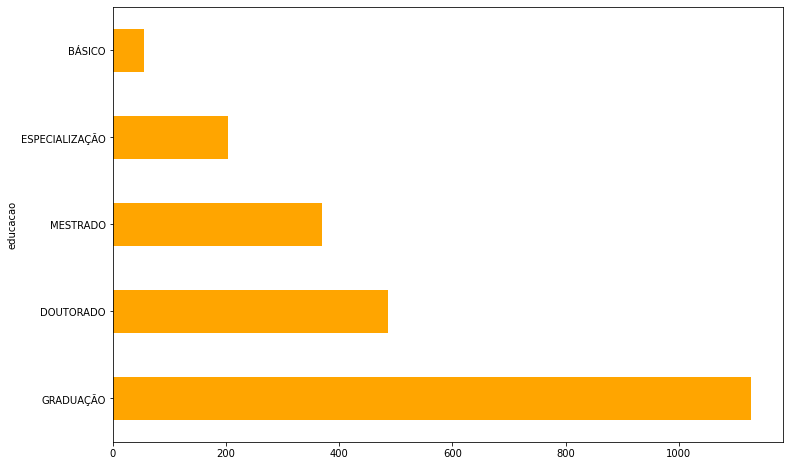

In [33]:
# Visualização do gráfico da educação
df.groupby(['educacao']).size().sort_values(ascending=False).plot.barh(figsize=(12,8),color=['orange'])

In [34]:
# ESTADO CIVIL
df.groupby(['estado_civil']).size().sort_values(ascending=False)

estado_civil
CASADO(A)        864
JUNTO(A)         580
SOLTEIRO(A)      480
DIVORCIADO(A)    232
VIÚVO(A)          77
SOZINHO            3
DESCONHECIDO       2
YOLO               2
dtype: int64

In [35]:
# Cálculo de porcentagem do estado civil
casado = (864/2240)*100
junto = (580/2240)*100
solt = (480/2240)*100
div = (232/2240)*100
viuv = (77/2240)*100
sozi = (3/2240)*100
desc = (2/2240)*100
YOLO = (2/2240)*100

# Mostrando os resultados
print('Casados(as) representam ', round(casado,1),'%')
print('Junto(a)  representam ', round(junto,1),'%')
print('Solteiro(a) representam ', round(solt,1),'%')
print('Divorciado(a) representam ', round(div,1),'%')
print('Viúvo(a) representam ', round(viuv,1),'%')
print('Sozinho(a) representam ', round(sozi,1),'%')
print('Não informado representam ', round(desc,1),'%')
print('YOLO representam ', round(YOLO,1),'%')

Casados(as) representam  38.6 %
Junto(a)  representam  25.9 %
Solteiro(a) representam  21.4 %
Divorciado(a) representam  10.4 %
Viúvo(a) representam  3.4 %
Sozinho(a) representam  0.1 %
Não informado representam  0.1 %
YOLO representam  0.1 %


<AxesSubplot:ylabel='estado_civil'>

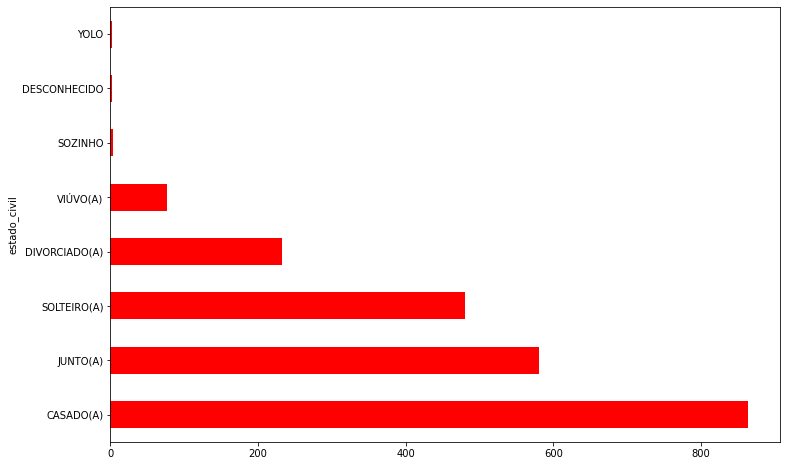

In [36]:
# Visualização do estado civil
df.groupby(['estado_civil']).size().sort_values(ascending=False).plot.barh(figsize=(12,8), color=['red'])

In [37]:
# FILHOS
df.groupby(['pais'],dropna=False).size().sort_values(ascending=False)

pais
Sim    1602
Não     638
dtype: int64

<AxesSubplot:ylabel='Percentual de clientes com filhos'>

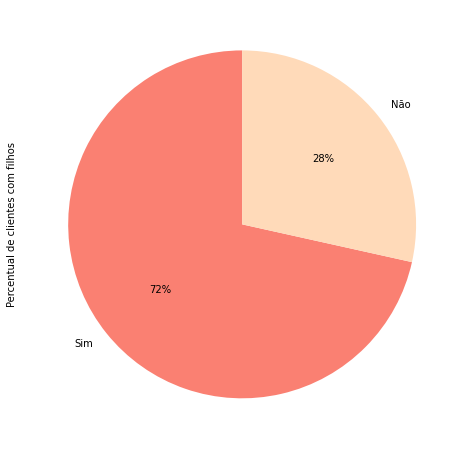

In [38]:
# Percentual de clientes com filhos
colors = ['#FA8072', '#FFDAB9']
df.groupby(['pais'],dropna=False).size().sort_values(ascending=False).plot(kind='pie', ylabel= 'Percentual de clientes com filhos', figsize=(12, 8), autopct='%1.0f%%', startangle=90, colors=colors)

In [39]:
# RENDA
# Renda anual máxima e mínima dos clientes
print('A renda anual mínima é: ', df['renda_anual'].min(), 'dólares')
print('A renda anual máxma é: ',  df['renda_anual'].max(), 'dólares')

A renda anual mínima é:  1730.0 dólares
A renda anual máxma é:  666666.0 dólares


<AxesSubplot:>

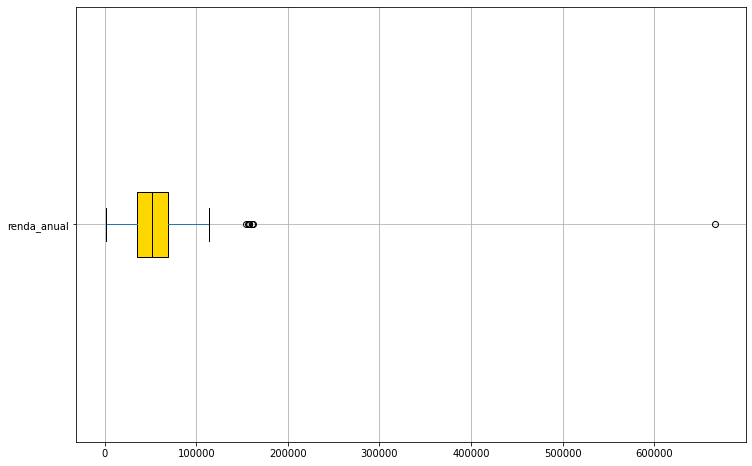

In [40]:
# Visualização da renda da maioria dos clientes sem os outliers via showfliers=False.
df.renda_anual.plot.box(vert=False, 
                        showfliers=True, 
                        grid=True, 
                        figsize=(12,8), 
                        patch_artist=True, 
                        medianprops=dict(color='black'), 
                        capprops=dict(color='black'), 
                        boxprops=dict(facecolor='Gold', color='black'),
                       )

<AxesSubplot:>

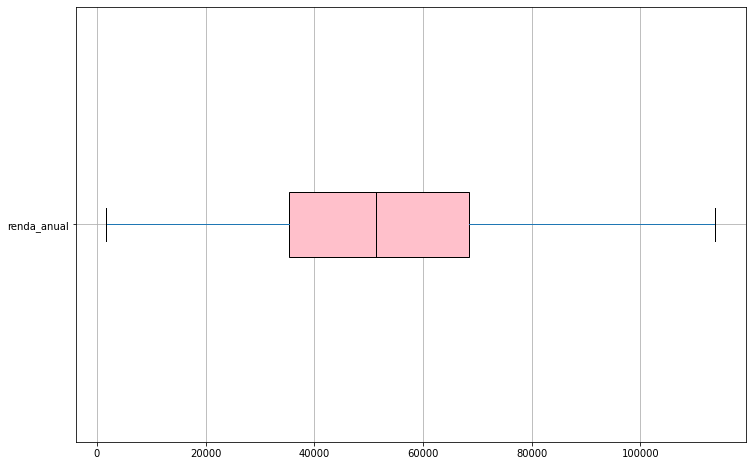

In [41]:
# Visualização da renda da maioria dos clientes sem os outliers via showfliers=False.
df.renda_anual.plot.box(vert=False, 
                        showfliers=False, 
                        grid=True, 
                        figsize=(12,8), 
                        patch_artist=True, 
                        medianprops=dict(color='black'), 
                        capprops=dict(color='black'), 
                        boxprops=dict(facecolor='Pink', color='black'),
                       )

### **2. O QUE NOSSOS CLIENTES COMPRAM? (GERAL)** ###

In [42]:
# Valor gasto nos iten  nos últimos 2 anos
soma = df[['vinho', 'fruta', 'carne','peixe','doce']].sum().sort_values(ascending=False)
print(soma)
print('O valor arrecadado em compras nos últimos 2 anos foi de: ', soma.sum())

vinho    680816
carne    373968
peixe     84057
doce      60621
fruta     58917
dtype: int64
O valor arrecadado em compras nos últimos 2 anos foi de:  1258379


In [43]:
# Cálculo de porcentagem forma 2
# Declarando as entradas do código
total_vendas = 1258379
gastos = {'vinho': 680816,
          'carne': 373968,
          'peixe': 84057,
          'doce': 60621,
          'fruta': 58917
          }

# Calculando as porcentagens
porcentagens = {}
for categoria, valor in gastos.items():
    porcentagem = (valor / total_vendas) * 100
    porcentagens[categoria] = porcentagem

# Mostrando os resultados
for categoria, porcentagem in porcentagens.items():
    print(f'O valor gasto em {categoria} nos últimos 2 anos corresponde a {porcentagem:.1f}%')

O valor gasto em vinho nos últimos 2 anos corresponde a 54.1%
O valor gasto em carne nos últimos 2 anos corresponde a 29.7%
O valor gasto em peixe nos últimos 2 anos corresponde a 6.7%
O valor gasto em doce nos últimos 2 anos corresponde a 4.8%
O valor gasto em fruta nos últimos 2 anos corresponde a 4.7%


<AxesSubplot:>

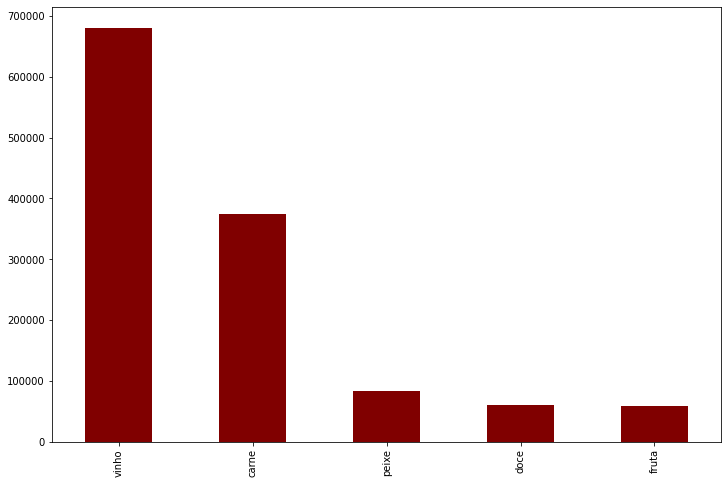

In [44]:
# Visualização
data = {'vinho': 680816, 'carne': 373968, 'peixe': 84057, 'doce': 60621, 'fruta': 58917}
series = pd.Series(data)
series.plot.bar(figsize=(12,8),color=['Maroon'])

### **3. COMO NOSSOS CLIENTES COMPRAM? (GERAL)** ###

In [45]:
# COMPRAS
soma = df[['n_web_compras', 'n_catalog_compras', 'n_loja_compras']].sum().sort_values(ascending=False)
print(soma)
print('Total de compras: ', soma.sum())

n_loja_compras       12970
n_web_compras         9150
n_catalog_compras     5963
dtype: int64
Total de compras:  28083


In [46]:
# Cálculo de porcentagem forma 2
# Declarando as entradas do código
total_vendas = 28083
locais = {'n_loja_compras': 12970,
          'n_web_compras': 9150,
          'n_catalog_compras': 5963,
          }

# Calculando as porcentagens
porcentagens = {}
for categoria, valor in locais.items():
    porcentagem = (valor / total_vendas) * 100
    porcentagens[categoria] = porcentagem

# Mostrando os resultados
for categoria, porcentagem in porcentagens.items():
    print(f'As compras são origem na(o) {categoria} corresponde a {porcentagem:.1f}% das vendas')

As compras são origem na(o) n_loja_compras corresponde a 46.2% das vendas
As compras são origem na(o) n_web_compras corresponde a 32.6% das vendas
As compras são origem na(o) n_catalog_compras corresponde a 21.2% das vendas


<AxesSubplot:ylabel='Tráfego de compras'>

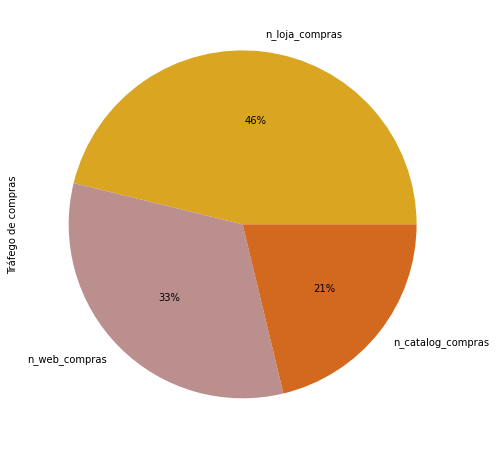

In [47]:
colors = ['#DAA520', 'RosyBrown', 'Chocolate']
df[['n_web_compras', 'n_catalog_compras', 'n_loja_compras']].sum().sort_values(ascending=False).plot.pie( figsize=(12, 8), 
                                                                                                          autopct='%1.0f%%', 
                                                                                                          startangle=0, 
                                                                                                          colors=colors,
                                                                                                          ylabel='Tráfego de compras')

### **4. QUAL CAMPANHA FOI  A MAIS ADEQUADA? (GERAL)**

In [48]:
# Avaliando as campanhas: avalia se o cliente aceitou a oferta na (1°,2°,..., última campanha) ou não
print(df.groupby(['aceitoCmp_1'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')

print(df.groupby(['aceitoCmp_2'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')

print(df.groupby(['aceitoCmp_3'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')

print(df.groupby(['aceitoCmp_4'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')

print(df.groupby(['aceitoCmp_5'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')

print(df.groupby(['ult_aceitoCmp'],dropna=False).size().sort_values(ascending=False))

aceitoCmp_1
Não    2096
Sim     144
dtype: int64

--------------------------------------------------------------------
aceitoCmp_2
Não    2210
Sim      30
dtype: int64

--------------------------------------------------------------------
aceitoCmp_3
Não    2077
Sim     163
dtype: int64

--------------------------------------------------------------------
aceitoCmp_4
Não    2073
Sim     167
dtype: int64

--------------------------------------------------------------------
aceitoCmp_5
Não    2077
Sim     163
dtype: int64

--------------------------------------------------------------------
ult_aceitoCmp
Não    1906
Sim     334
dtype: int64


<AxesSubplot:>

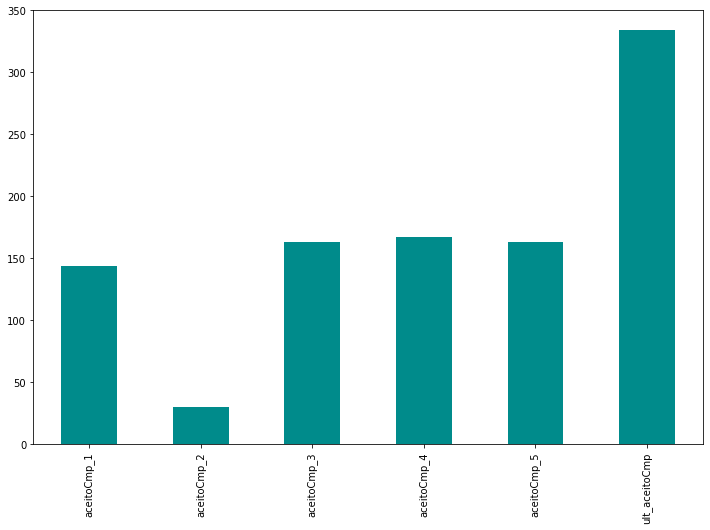

In [49]:
# Visualização dos aceites das campanhas
data = {'aceitoCmp_1': 144, 'aceitoCmp_2': 30, 'aceitoCmp_3': 163, 'aceitoCmp_4': 167, 'aceitoCmp_5': 163, 'ult_aceitoCmp': 334}
data = pd.Series(data)
data.plot.bar(figsize=(12,8),color=['DarkCyan'])

In [50]:
# Segmentando a última campanha
filtro_sim = df.loc[df.ult_aceitoCmp == 'Sim']
filtro_sim

,educacao,estado_civil,renda_anual,qtd_crianca,qtd_adolescente,data_cadastro,n_dias_ultima_compra,vinho,fruta,carne,peixe,doce,pdt_ouro,n_desconto_compras,n_web_compras,n_catalog_compras,n_loja_compras,n_visit_web,aceitoCmp_3,aceitoCmp_4,aceitoCmp_5,aceitoCmp_1,aceitoCmp_2,reclamacao,ult_aceitoCmp,pais,idade
0,GRADUAÇÃO,SOLTEIRO(A),58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,Não,Não,Não,Não,Não,Não,Sim,Não,63
8,DOUTORADO,JUNTO(A),30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,Não,Não,Não,Não,Não,Não,Sim,Sim,46
15,DOUTORADO,SOLTEIRO(A),82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,Não,Não,Sim,Sim,Não,Não,Sim,Não,74
33,DOUTORADO,DIVORCIADO(A),46610.0,0,2,2012-10-29,8,96,12,96,33,22,43,6,4,1,6,6,Não,Não,Não,Não,Não,Não,Sim,Sim,68
39,DOUTORADO,DIVORCIADO(A),48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,Sim,Não,Não,Não,Não,Não,Sim,Não,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,GRADUAÇÃO,CASADO(A),73803.0,0,1,2012-08-01,61,833,80,363,52,26,174,2,9,5,6,6,Sim,Não,Não,Não,Não,Não,Sim,Sim,63
2198,GRADUAÇÃO,CASADO(A),50501.0,1,1,2013-06-18,10,297,0,38,13,0,152,7,5,4,4,6,Sim,Não,Não,Não,Não,Não,Sim,Sim,66
2202,DOUTORADO,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,Não,Não,Não,Não,Não,Não,Sim,Sim,47
2221,MESTRADO,SOLTEIRO(A),75777.0,0,0,2013-07-04,12,712,26,538,69,13,80,1,3,6,11,1,Não,Sim,Sim,Não,Não,Não,Sim,Não,38


In [51]:
# Quais caracteriticas de quem aceitou a última oferta?
print(filtro_sim.groupby(['educacao','ult_aceitoCmp']).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')
print(filtro_sim.groupby(['estado_civil','ult_aceitoCmp']).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')
print(filtro_sim.groupby(['idade','ult_aceitoCmp']).size().sort_values(ascending=False).head(12))
print('\n--------------------------------------------------------------------')
print(filtro_sim.groupby(['pais','ult_aceitoCmp']).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')

educacao        ult_aceitoCmp
GRADUAÇÃO       Sim              152
DOUTORADO       Sim              101
MESTRADO        Sim               57
ESPECIALIZAÇÃO  Sim               22
BÁSICO          Sim                2
dtype: int64

--------------------------------------------------------------------
estado_civil   ult_aceitoCmp
SOLTEIRO(A)    Sim              106
CASADO(A)      Sim               98
JUNTO(A)       Sim               60
DIVORCIADO(A)  Sim               48
VIÚVO(A)       Sim               19
DESCONHECIDO   Sim                1
SOZINHO        Sim                1
YOLO           Sim                1
dtype: int64

--------------------------------------------------------------------
idade  ult_aceitoCmp
50     Sim              16
49     Sim              14
48     Sim              14
38     Sim              13
43     Sim              11
71     Sim              11
47     Sim              11
46     Sim              11
45     Sim              11
36     Sim              11
37     Sim 

### **5. SEGMENTAÇÃO DO PÚBLICO PREMIUM**

<AxesSubplot:>

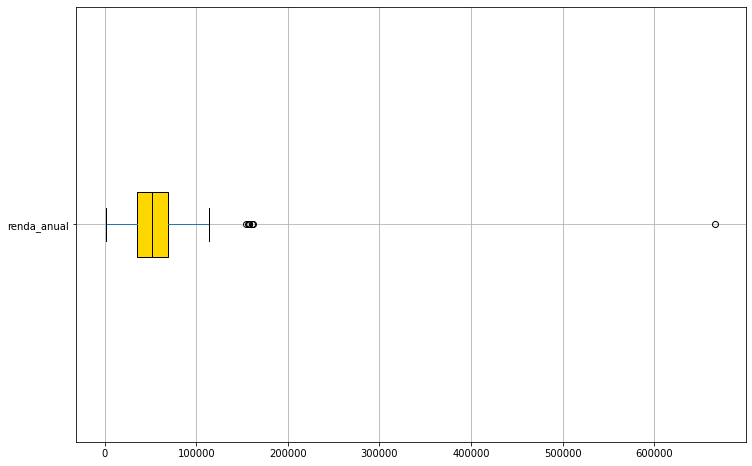

In [52]:
# Visualização da renda da maioria dos clientes sem os outliers via showfliers=False.
df.renda_anual.plot.box(vert=False, 
                        showfliers=True, 
                        grid=True, 
                        figsize=(12,8), 
                        patch_artist=True, 
                        medianprops=dict(color='black'), 
                        capprops=dict(color='black'), 
                        boxprops=dict(facecolor='Gold', color='black'),
                       )

In [53]:
# Análise feita dos consumidores que possuem renda anual acima de 68522.00 dolares 
df_rico = df.loc[df.renda_anual > 68522.0]

In [54]:
# Quantos clientes premium temos?
print('Tamanho da base filtrada é: ', df_rico.shape)
print('Tamanho da base original é: ', df.shape)

Tamanho da base filtrada é:  (554, 27)
Tamanho da base original é:  (2240, 27)


In [55]:
# Do total de 2240, quanto representam esses clientes?
print('A porcentagem de clientes do tipo premium é de: {:.2f}%'.format(554/2240*100))

A porcentagem de clientes do tipo premium é de: 24.73%


In [56]:
# CARACTERIZAÇÃO DO CLIENTE
print(df_rico.groupby(['educacao'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')
print(df_rico.groupby(['estado_civil'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')
print(df_rico.groupby(['idade'],dropna=False).size().sort_values(ascending=False).head(10))
print('\n--------------------------------------------------------------------')

educacao
GRADUAÇÃO         303
DOUTORADO         127
MESTRADO           83
ESPECIALIZAÇÃO     41
dtype: int64

--------------------------------------------------------------------
estado_civil
CASADO(A)        208
JUNTO(A)         145
SOLTEIRO(A)      121
DIVORCIADO(A)     59
VIÚVO(A)          20
DESCONHECIDO       1
dtype: int64

--------------------------------------------------------------------
idade
55    22
50    20
49    19
48    19
45    19
62    18
58    17
44    17
68    16
61    16
dtype: int64

--------------------------------------------------------------------


In [57]:
df_rico.describe()

,renda_anual,qtd_crianca,qtd_adolescente,n_dias_ultima_compra,vinho,fruta,carne,peixe,doce,pdt_ouro,n_desconto_compras,n_web_compras,n_catalog_compras,n_loja_compras,n_visit_web,idade
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,80580.895307,0.079422,0.277978,48.942238,634.758123,60.794224,435.989170,88.734657,65.075812,72.299639,1.415162,5.287004,5.698556,8.337545,2.915162,52.207581
std,27427.419849,0.277242,0.479586,29.506004,333.230062,48.900285,253.406798,65.444868,52.841652,61.222156,1.402989,2.407555,2.919864,2.919003,1.847246,13.090389
min,68627.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,72380.500000,0.000000,0.000000,23.000000,386.250000,23.000000,240.000000,35.000000,24.000000,27.000000,1.000000,4.000000,4.000000,6.000000,1.250000,43.000000
50%,77805.500000,0.000000,0.000000,49.000000,586.500000,44.500000,407.500000,73.000000,47.500000,52.000000,1.000000,5.000000,5.000000,8.000000,2.000000,51.000000
75%,82648.500000,0.000000,1.000000,73.750000,880.500000,92.000000,592.000000,133.000000,101.000000,102.750000,1.000000,7.000000,7.000000,11.000000,4.000000,62.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1725.000000,258.000000,262.000000,249.000000,15.000000,27.000000,28.000000,13.000000,9.000000,121.000000


<AxesSubplot:ylabel='Percentual de clientes premium com filhos'>

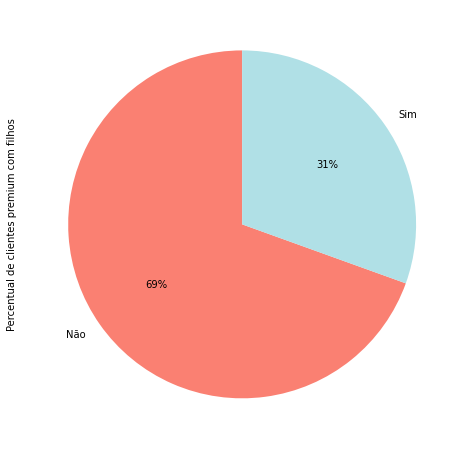

In [58]:
colors = ['#FA8072', '#B0E0E6']
df_rico.groupby(['pais'],dropna=False).size().sort_values(ascending=False).plot(kind='pie', ylabel= 'Percentual de clientes premium com filhos', figsize=(12, 8), autopct='%1.0f%%', startangle=90, colors=colors)

In [59]:
# COMPRAS
# Valor gasto nos iten  nos últimos 2 anos
soma = df_rico[['vinho', 'fruta', 'carne','peixe','doce']].sum().sort_values(ascending=False)
print(soma)
print('O valor arrecadado em compras nos últimos 2 anos foi de: ', soma.sum())

vinho    351656
carne    241538
peixe     49159
doce      36052
fruta     33680
dtype: int64
O valor arrecadado em compras nos últimos 2 anos foi de:  712085


In [60]:
# Cálculo de porcentagem forma 2
# Declarando as entradas do código
total_vendas = 712085
gastos = {'vinho': 351656,
          'carne': 241538,
          'peixe': 49159,
          'doce': 36052,
          'fruta': 33680
          }

# Calculando as porcentagens
porcentagens = {}
for categoria, valor in gastos.items():
    porcentagem = (valor / total_vendas) * 100
    porcentagens[categoria] = porcentagem

# Mostrando os resultados
for categoria, porcentagem in porcentagens.items():
    print(f'O valor gasto em {categoria} nos últimos 2 anos corresponde a {porcentagem:.1f}%')

O valor gasto em vinho nos últimos 2 anos corresponde a 49.4%
O valor gasto em carne nos últimos 2 anos corresponde a 33.9%
O valor gasto em peixe nos últimos 2 anos corresponde a 6.9%
O valor gasto em doce nos últimos 2 anos corresponde a 5.1%
O valor gasto em fruta nos últimos 2 anos corresponde a 4.7%


In [61]:
print('O valor arrecadado em compras nos últimos 2 anos desse público representa:', round((712085/1258379)*100,1), '%')

O valor arrecadado em compras nos últimos 2 anos desse público representa: 56.6 %


In [62]:
# COMPRAS
soma = df_rico[['n_web_compras', 'n_catalog_compras', 'n_loja_compras']].sum().sort_values(ascending=False)
print(soma)
print('Total de compras: ', soma.sum())

n_loja_compras       4619
n_catalog_compras    3157
n_web_compras        2929
dtype: int64
Total de compras:  10705


In [63]:
# Cálculo de porcentagem forma 2
# Declarando as entradas do código
total_vendas = 10705
locais = {'n_loja_compras': 4619,
          'n_catalog_compras': 3157,
          'n_web_compras ': 2929,
          }

# Calculando as porcentagens
porcentagens = {}
for categoria, valor in locais.items():
    porcentagem = (valor / total_vendas) * 100
    porcentagens[categoria] = porcentagem

# Mostrando os resultados
for categoria, porcentagem in porcentagens.items():
    print(f'As compras são origem na(o) {categoria} corresponde a {porcentagem:.1f}% das vendas')

As compras são origem na(o) n_loja_compras corresponde a 43.1% das vendas
As compras são origem na(o) n_catalog_compras corresponde a 29.5% das vendas
As compras são origem na(o) n_web_compras  corresponde a 27.4% das vendas


In [64]:
#CAMPANHAS
# Avaliando as campanhas do publico premium: avalia se o cliente aceitou a oferta na (1°,2°,..., última campanha) ou não
print(df_rico.groupby(['aceitoCmp_1'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')

print(df_rico.groupby(['aceitoCmp_2'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')

print(df_rico.groupby(['aceitoCmp_3'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')

print(df_rico.groupby(['aceitoCmp_4'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')

print(df_rico.groupby(['aceitoCmp_5'],dropna=False).size().sort_values(ascending=False))
print('\n--------------------------------------------------------------------')

print(df_rico.groupby(['ult_aceitoCmp'],dropna=False).size().sort_values(ascending=False))

aceitoCmp_1
Não    433
Sim    121
dtype: int64

--------------------------------------------------------------------
aceitoCmp_2
Não    538
Sim     16
dtype: int64

--------------------------------------------------------------------
aceitoCmp_3
Não    511
Sim     43
dtype: int64

--------------------------------------------------------------------
aceitoCmp_4
Não    477
Sim     77
dtype: int64

--------------------------------------------------------------------
aceitoCmp_5
Não    401
Sim    153
dtype: int64

--------------------------------------------------------------------
ult_aceitoCmp
Não    405
Sim    149
dtype: int64


<AxesSubplot:>

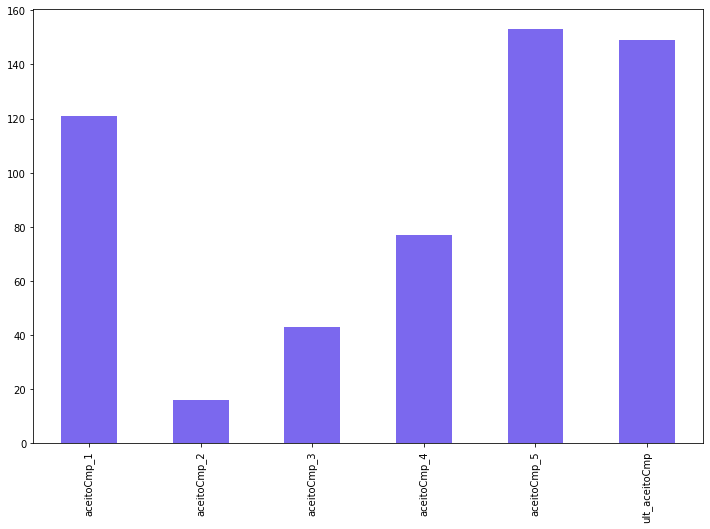

In [65]:
# Visualização dos aceites das campanhas do público premium
data = {'aceitoCmp_1': 121, 'aceitoCmp_2': 16, 'aceitoCmp_3': 43, 'aceitoCmp_4': 77, 'aceitoCmp_5': 153, 'ult_aceitoCmp': 149}
data = pd.Series(data)
data.plot.bar(figsize=(12,8),color=['MediumSlateBlue'])

## **Conclusões**

**1. Quem são nossos clientes?**

São pessoas entre 13 a 61 anos, com grau de escolaridade alto (graduação, mestrado e doutorado). Cerca de 64% são  casais, seguido pelos solteiros em torno de 25%. 72% dos clientes possuem filhos e a renda  varia entre 38-70 mil dolares/ano (3000-6000 dolares/mês aproximadamente).

**2. O que nossos clientes compram?**

Os produtos mais vendidos nos últimos 2 anos são vinho e carne com 83,8% das receitas.

**3. Como nossos clientes compram?**
Aproximadamente,80% das compras são feitas na loja e na internet.


**4. Qual campanha foi a mais adequada?**

A última oferta foi aceita pela maioria de clientes solteiros como casados, com graduação e doutorado e idades entre 45 a 71 anos, sendo essa a mais efetiva. Recomenda-se manter a estratégia da equipe de marketing

**5. Segmentação do público premium**

Cerca de 25% dos nossos clientes ganham acima de 68522 dolares anual. São clientes que em sua grande maioria possui graduação ou doutorado, são casados, não possuem filhos e idade entre 43-62 anos. O valor arrecadado em compras nos últimos 2 anos por esse seleto público representa 56.6 % com 83% das compras são em vinhos e carne. Cerca de 72% dessse público compram na loja e por catalogo. As estratégias das campanhas 1, 4 e 5 tiveram mais aceite desse seleto grupo;
